# MXNet Computations

## Overview

What is MXNet?

- Library for building neural networks.
- Enables algorithms to run on GPUs for faster processing.
- Enables parallelization across instances.
- Uses symbolic programs to enable Python code to run as fast as C.

## Symbolic Programs

How does using symbolic programming speed up the program?

- The Python defines the computation.
- Computation is defined as a DAG (Directed Acyclic Graph).
- Computation happens at native layer after DAG completely defined.

## Symbol

What is a `Symbol`?

- A `Symbol` is a multi-output symbolic expression. 
- It can be a single variable. 
- Or it could be an expression composed of variables.

## Symbolic Computation

Let's define a symbolic computation.

In [1]:
import mxnet as mx

a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a + b

Let's visualize the computation graph.

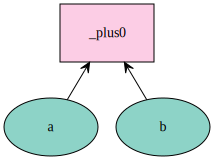

In [2]:
mx.viz.plot_network(c)

Let's make things more complicated.

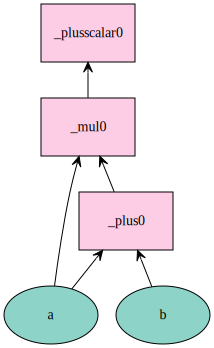

In [3]:
d = c * a + 10
mx.viz.plot_network(d)

## Module

What is a module?

- A `Module` is a machine that can execute a program defined by `Symbol`.

## Module APIs

Here are some things you can do with modules.

```python
# Call high-level APIs to train and predict.
mod.fit(nd_iter, num_epoch=10, ...) 
mod.predict(new_nd_iter) 

# Use intermediate-level APIs to train. 
mod.forward(data_batch)
mod.backward()
mod.update()
```

## Neural Networks

Here is how you can define neural networks using MXNet.

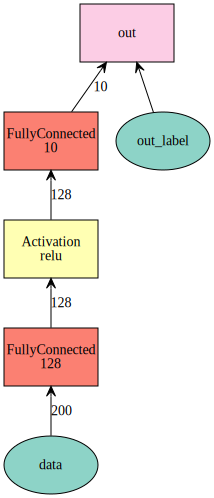

In [4]:
net = mx.sym.Variable ('data')
net = mx.sym.FullyConnected (data=net, name='fc1', num_hidden=128)
net = mx.sym.Activation (data=net, name='relu1', act_type="relu")
net = mx.sym.FullyConnected (data=net, name='fc2', num_hidden=10)
net = mx.sym.SoftmaxOutput (data=net, name='out')
mx.viz.plot_network (net, shape={'data' : (100,200) } )

## Context

What does a context indicate in MXNet?

- Context determines if your vector is processed on CPU or GPU.

## GPU vs CPU

Let's create some vectors in MXNet and then see if we can move them to the GPU.

In [5]:
import mxnet as mx
from mxnet import nd

# Initialize random seed.
mx.random.seed(1)

# Generate some vectors.
x = nd.random_normal(0, 1, shape=(3,4))
y = nd.ones((3,4))

# Print x.
print(x)


[[ 0.03629481 -0.49024421 -0.95017916  0.03751944]
 [-0.72984636 -2.04010558  1.482131    1.04082799]
 [-0.45256865  0.31160426 -0.83673781 -0.78830057]]
<NDArray 3x4 @cpu(0)>


In [6]:
# Print y.
print(y)


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>


In [7]:
# Find if x is on GPU or CPU.
print(x.context)

cpu(0)


In [8]:
# Copy x to GPU context.
try:
    x_gpu = x.copyto(mx.gpu(0))
except:
    print("GPU is not supported on this machine.") 

GPU is not supported on this machine.


If GPU was supported on the machine this operation would create `x_gpu` which would run its computations on the GPU.